In [1]:
import threeplayers as ppp
import twoplayers as pp
import utility as util

import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from numba import jit
import numba as nb
from IPython.display import clear_output
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import PercentFormatter
import math
import time

Note: the code takes an extremely long time to run (possibly days)! We have set all $N=10$ to get examples of the plots within a reasonable timeframe. The plots in the paper are mostly run with $N=1000$. 

In [2]:
# set general fineness of price grid (will be overwritten when relevant)
k = 48

## Profitability

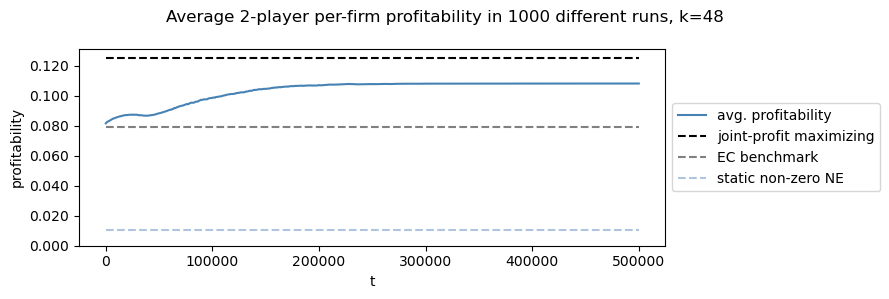

In [3]:
# plot profitability 2 players
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/1000-1)
summed_avg_profitabilities = np.zeros(num_calcs)

for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    per_firm_profit = np.sum([avg_profs1, avg_profs2], axis=0)/2
    summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
    
avg_avg_profitabilities = np.divide(summed_avg_profitabilities, N)
    
fig, axs = plt.subplots(1, 1, figsize=(9,3))
fig.suptitle("Average 2-player per-firm profitability in {} different runs, k={}".format(N, k))
axs.set_xlabel("t")
axs.set_ylabel("profitability")

xs = np.linspace(0, T, num_calcs)

# compute competitive benchmark profitabilities
benchprices2 = prices[:int(prices.size/2)+2]
bench2 = util.benchmark_two_player(benchprices2)
NE_profit = pp.profit(prices[1], prices[1])

axs.set_ylim(0.00, 0.125+(0.125*0.05))

axs.plot(xs, avg_avg_profitabilities, color="steelblue", label = "avg. profitability")
axs.plot(xs, [0.125]*len(xs), color='black', label='joint-profit maximizing', linestyle='dashed')
axs.plot(xs, [bench2]*len(xs), color='grey', label='EC benchmark', linestyle='dashed')
axs.plot(xs, [NE_profit]*len(xs), color='lightsteelblue', label='static non-zero NE', linestyle='dashed')
#axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
#plt.legend()
plt.savefig("figures/profitability2player_k%s.png"%k)

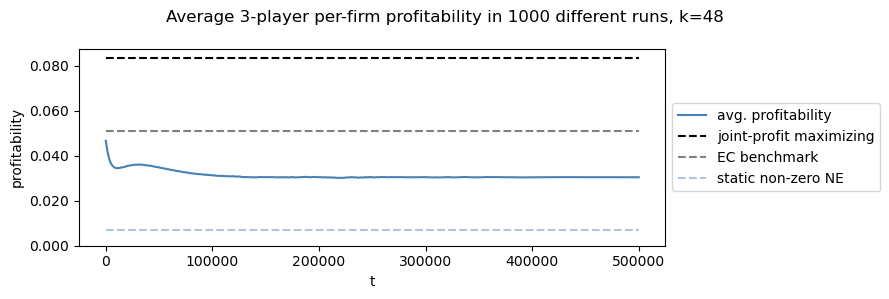

In [4]:
# plot profitability 3 players
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/1000-1)
summed_avg_profitabilities = np.zeros(num_calcs)

for n in range(0, N):
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    per_firm_profit = np.sum([avg_profs1, avg_profs2, avg_profs3], axis=0)/3
    summed_avg_profitabilities = np.sum([summed_avg_profitabilities, per_firm_profit], axis=0)
    
avg_avg_profitabilities = np.divide(summed_avg_profitabilities, N)
    
fig, axs = plt.subplots(1, 1, figsize=(9,3))

fig.suptitle("Average 3-player per-firm profitability in {} different runs, k={}".format(N, k))
axs.set_xlabel("t")
axs.set_ylabel("profitability")

xs = np.linspace(0, T, num_calcs)

# compute competitive benchmark profitabilities
benchprices3 = prices[:int(prices.size/2)+3]
bench3 = util.benchmark_three_player(benchprices3)
NE_profit = ppp.profit(prices[1], prices[1], prices[1])

axs.set_ylim(0.0, 0.08333+(0.08333*0.05))
axs.plot(xs, avg_avg_profitabilities, color="steelblue", label = "avg. profitability")
axs.plot(xs, [0.08333]*len(xs), color='black', label='joint-profit maximizing', linestyle='dashed')
axs.plot(xs, [bench3]*len(xs), color='grey', label='EC benchmark', linestyle='dashed')
axs.plot(xs, [NE_profit]*len(xs), color='lightsteelblue', label='static non-zero NE', linestyle='dashed')
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#axs.xaxis.set_major_locator(ticker.MultipleLocator(1))
axs.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
fig.tight_layout()
#plt.legend()
plt.savefig("figures/profitability3player_k%s.png"%k)

## Average profit gain

In [5]:
## PROFIT GAIN DISTRIBUTION
@njit
def find_profit_gain_distribution3(k):
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 10
    prices = np.linspace(0, 1, k+1)
    jointprofitability=nb.typed.List.empty_list(nb.f8)
    distribution=nb.typed.List.empty_list(nb.f8)
    
    profNE = ppp.profit(prices[1], prices[1], prices[1]) # static Bertrand-Nash Equilibrium profit
    
    for n in range(0, N):
        p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation(alpha, delta, T, prices)
        distribution.append((((avg_profs0[-1]+avg_profs1[-1]+avg_profs2[-1])/3))/(0.08333333333333333))
    return N, distribution

In [6]:
@njit
def find_profit_gain_distribution2(k):
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 10
    prices = np.linspace(0, 1, k+1)
    jointprofitability=nb.typed.List.empty_list(nb.f8)
    distribution=nb.typed.List.empty_list(nb.f8)
    
    profNE = pp.profit(prices[1], prices[1]) # static Bertrand-Nash Equilibrium profit
    
    for n in range(0, N):
        p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation(alpha, delta, T, prices)
        distribution.append((((avg_profs0[-1]+avg_profs1[-1])/2))/(0.125))
    return N, distribution

k: 6
k: 48


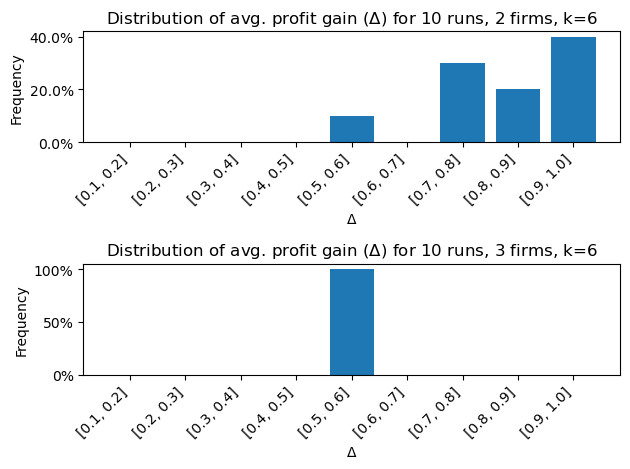

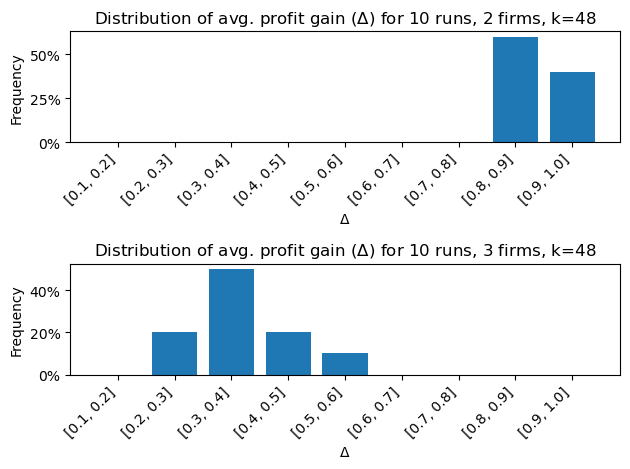

In [7]:
for k in [6, 48]:
    print("k:", k)
    fig, axs = plt.subplots(2, 1)

    N, distribution2 = find_profit_gain_distribution2(k)
    length = len(distribution2)

    bins = [i/10 for i in range(1, 11)]

    axs[0].hist(distribution2, bins=bins, rwidth=0.8, weights=np.ones(length) / length)
    axs[0].set_xlabel('$\Delta$')
    axs[0].set_ylabel('Frequency')
    axs[0].set_title('Distribution of avg. profit gain ($\Delta$) for {} runs, 2 firms, k={}'.format(N, k))
    axs[0].yaxis.set_major_formatter(PercentFormatter(1))
    axs[0].set_xticks([(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)])
    axs[0].set_xticklabels(['[{:.1f}, {:.1f}]'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)], rotation=45, ha='right')


    N, distribution3 = find_profit_gain_distribution3(k)
    length = len(distribution3)

    axs[1].hist(distribution3, bins=bins, rwidth=0.8, weights=np.ones(length) / length)

    axs[1].set_xlabel('$\Delta$')
    axs[1].set_ylabel('Frequency')
    axs[1].set_title('Distribution of avg. profit gain ($\Delta$) for {} runs, 3 firms, k={}'.format(N, k))
    axs[1].yaxis.set_major_formatter(PercentFormatter(1))
    axs[1].set_xticks([(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)])
    axs[1].set_xticklabels(['[{:.1f}, {:.1f}]'.format(bins[i], bins[i+1]) for i in range(len(bins)-1)], rotation=45, ha='right')

    plt.tight_layout()
    plt.savefig("figures/profit_gain_histogram_k%s.png"%k)

In [8]:
## Robustness in k
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10

joint_profitability = np.zeros(int(T/50000 - 1))
ks = [6, 12, 18, 24, 30, 36, 42, 48]
avg_profit_gains_three = []
avg_profit_gains_two = []

for idx, k in enumerate(ks):
    prices = np.linspace(0, 1, k+1)
    
    per_firm_profitabilities_three = np.zeros(N)
    per_firm_profitabilities_two = np.zeros(N)
    
    for n in range(0, N):
        # 3 player simulation
        p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation(alpha, delta, T, prices)
        last_per_firm_profitability_three = (avg_profs0[-1] + avg_profs1[-1] + avg_profs2[-1]) / 3
        per_firm_profitabilities_three[n] = last_per_firm_profitability_three
        
        # 2 player simulation
        
        p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation(alpha, delta, T, prices)
        last_per_firm_profitability_two = (avg_profs0[-1] + avg_profs1[-1]) / 2
        per_firm_profitabilities_two[n] = last_per_firm_profitability_two
    
    profNE3 = ppp.profit(prices[1], prices[1], prices[1]) # static Bertrand-Nash Equilibrium profit
    profNE2 = pp.profit(prices[1], prices[1]) # static Bertrand-Nash Equilibrium profit
    
    avg_per_firm_profitability_three = np.mean(per_firm_profitabilities_three)
    avg_per_firm_profitability_two = np.mean(per_firm_profitabilities_two)
    
    # divide profitability by monopoly profit to get profit gain
    profit_gain_three = np.divide(avg_per_firm_profitability_three, 0.08333)
    profit_gain_two = np.divide(avg_per_firm_profitability_two, 0.125)
    
    avg_profit_gains_three.append(profit_gain_three)
    avg_profit_gains_two.append(profit_gain_two)
print("avg_profit_gains_three: ", avg_profit_gains_three)
print("avg_profit_gains_two: ", avg_profit_gains_two)

avg_profit_gains_three:  [0.555577778666712, 0.3857709863950084, 0.40554832069825847, 0.4521541972790015, 0.4260877101750752, 0.4052825693274637, 0.37692822905659984, 0.36435762986074965]
avg_profit_gains_two:  [0.9055555555555612, 0.806355555555557, 0.8264543209876521, 0.888928819444447, 0.8541639999999985, 0.8764777777777806, 0.8645058956916116, 0.8553225694444461]


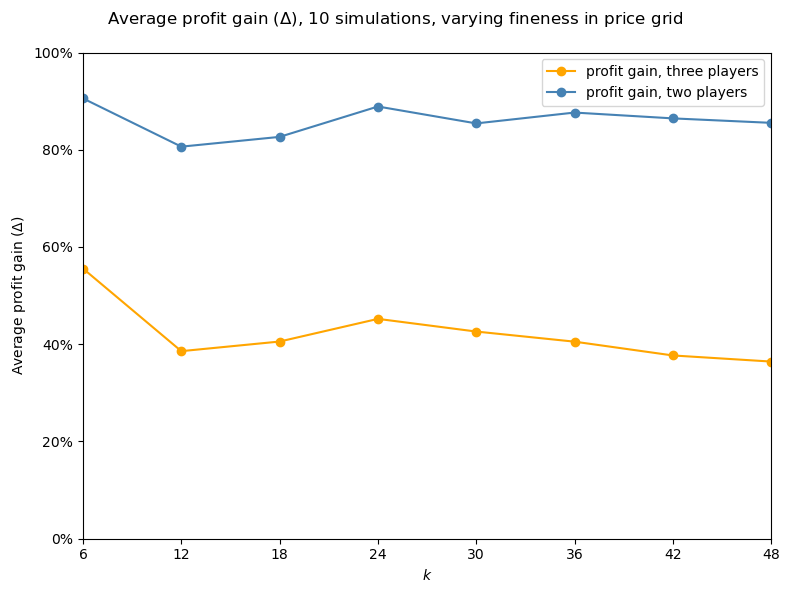

In [9]:
fig, axs = plt.subplots(1)
fig.suptitle("Average profit gain ($\Delta$), {} simulations, varying fineness in price grid".format(N))
fig.set_figheight(6)
fig.set_figwidth(8)
axs.set_xlabel("$k$")
axs.set_ylabel(r"Average profit gain ($\Delta$)")

axs.set_xlim(ks[0], ks[-1])
axs.set_ylim(0.00, 1)

axs.plot(ks, avg_profit_gains_three, color="orange", label = "profit gain, three players", marker='o')
axs.plot(ks, avg_profit_gains_two, color="steelblue", label = "profit gain, two players", marker='o')

axs.xaxis.set_major_locator(ticker.MultipleLocator(6))
axs.yaxis.set_major_formatter(PercentFormatter(1))
fig.tight_layout()
plt.legend()
#plt.show()
plt.savefig("figures/profit_gain_over_k.png")

## Strategy outcomes

for k in [6, 12, 24, 48]:
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 10
    prices = np.linspace(0, 1, k+1)
    num_calcs = int(T/12500-1)

    cycle2 = 0
    fixed2 = 0
    cycle3 = 0
    fixed3 = 0

    for n in range(0, N):
        p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
        var0 = np.var(p_table[0, -1000:])
        var1 = np.var(p_table[1, -1000:])
        avg_var = np.mean([var0, var1])
        if abs(avg_var - 0) < 0.01:
            fixed2 += 1
        else:
            cycle2 += 1

        p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
        var0 = np.var(p_table[0, -1000:])
        var1 = np.var(p_table[1, -1000:])
        var2 = np.var(p_table[2, -1000:])
        avg_var = np.mean([var0, var1, var2])
        if abs(avg_var - 0) < 0.01:
            fixed3 += 1
        else:
            cycle3 += 1

    fig, axs = plt.subplots(1, 2)
    fig.suptitle("End-game strategy outcomes, k={} ({} runs)".format(k, N))
    strats = ['fixed price','varying prices']
    outcomes = [fixed2, cycle2]
    axs[0].set_xlabel("Strategy outcome, two players")
    axs[0].set_ylabel("Frequency")
    axs[0].set_ylim(0, N)
    axs[0].bar(strats, outcomes)
    #axs[0].legend(loc='upper right')

    outcomes = [fixed3, cycle3]
    axs[1].set_xlabel("Strategy outcome, three players")
    axs[1].set_ylabel("Frequency")
    axs[1].set_ylim(0, N)
    axs[1].bar(strats, outcomes)
    #axs[1].legend(loc='upper right')

    fig.tight_layout()
    #plt.show()
    plt.savefig("figures/strategyoutcomes_k%s"%k)

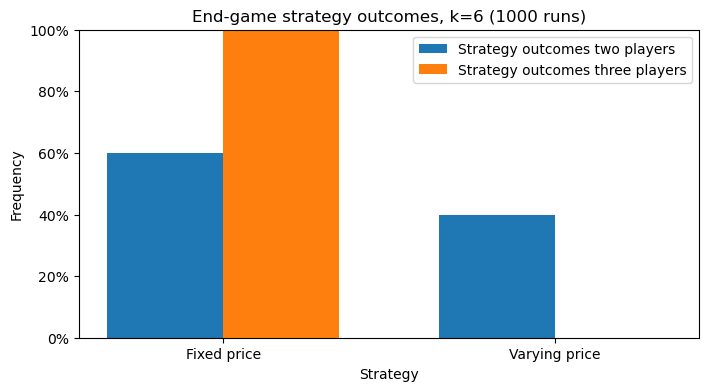

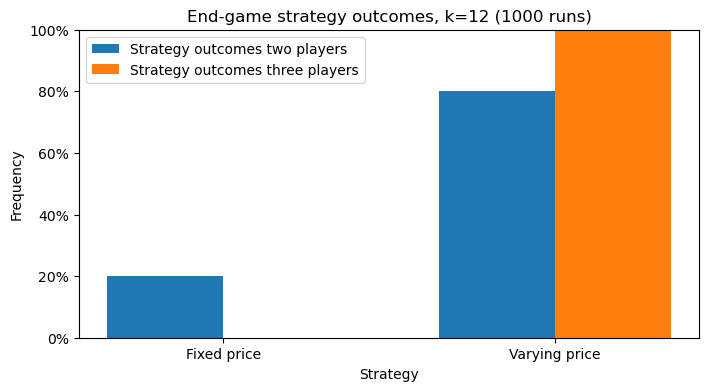

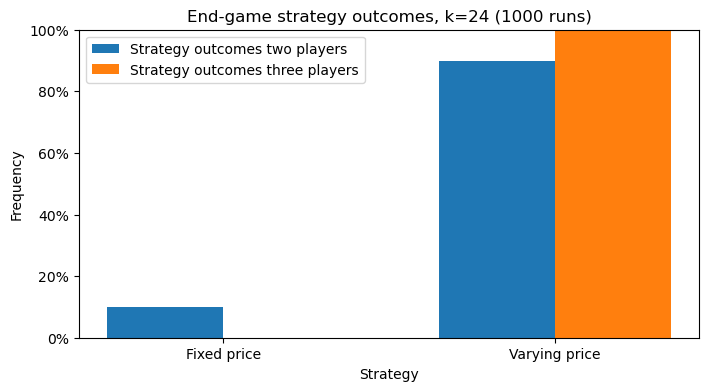

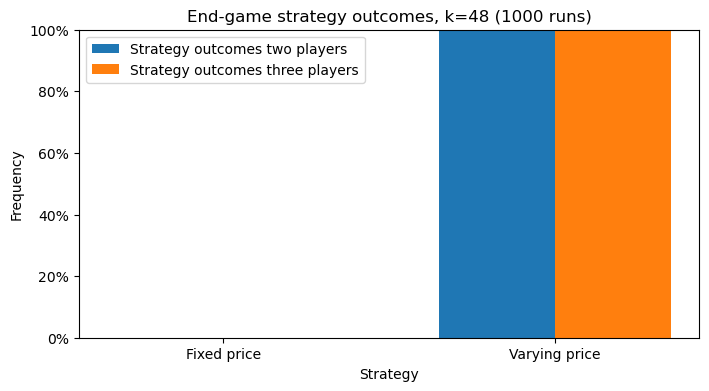

In [10]:
k_array = [6,12,24,48]
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10

fixed2_values = []
cycle2_values = []
fixed3_values = []
cycle3_values = []

for k in k_array:
    prices = np.linspace(0, 1, k + 1)
    num_calcs = int(T / 1000 - 1)

    cycle2 = 0
    fixed2 = 0
    cycle3 = 0
    fixed3 = 0

    for n in range(0, N):
        p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
        var0 = np.var(p_table[0, -1000:])
        var1 = np.var(p_table[1, -1000:])
        avg_var = np.mean([var0, var1])
        if abs(avg_var - 0) < 0.01:
            fixed2 += 1
        else:
            cycle2 += 1

        p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
        var0 = np.var(p_table[0, -1000:])
        var1 = np.var(p_table[1, -1000:])
        var2 = np.var(p_table[2, -1000:])
        avg_var = np.mean([var0, var1, var2])
        if abs(avg_var - 0) < 0.01:
            fixed3 += 1
        else:
            cycle3 += 1

    # Calculate the percentage values
    total = fixed2 + cycle2
    fixed2_percent = fixed2 / total * 100
    cycle2_percent = (cycle2) / total * 100

    total = (fixed3) + (cycle3)
    fixed3_percent = (fixed3) / total * 100
    cycle3_percent = (cycle3) / total * 100


    # Create a list of labels
    # Create a list of labels
    labels = ['Fixed price', 'Varying price']

    # Create a list of values
    fixed_values = [fixed2_percent, cycle2_percent]
    cycle_values = [fixed3_percent, cycle3_percent]

    # Set the positions of the bars on the x-axis
    x = [0, 1]

    # Set the width of the bars
    width = 0.35

    # Create the figure and axes
    fig, ax = plt.subplots(1, 1, figsize=(8,4))

    # Plot the bars for fixed values
    ax.bar(x, fixed_values, width, label='Strategy outcomes two players')

    # Plot the bars for cycle values
    ax.bar([i + width for i in x], cycle_values, width, label='Strategy outcomes three players')

    # Set the x-axis labels
    ax.set_xticks([i + width/2 for i in x])
    ax.set_xticklabels(labels)
    # Set the y-axis tick format as percentage
    ax.yaxis.set_major_formatter(ticker.PercentFormatter())

    # Set the y-axis label
    ax.set_ylabel('Frequency')
    ax.set_xlabel('Strategy')
    
    # Set the title
    ax.set_title(f'End-game strategy outcomes, k={k} (1000 runs)')
    ax.set_ylim(top=100)

    # Add a legend
    ax.legend()
    plt.savefig(f'figures/EndgameOutcomesk{k}.png', facecolor='w')
    # Show the plot
    #plt.show()

## Price cycles

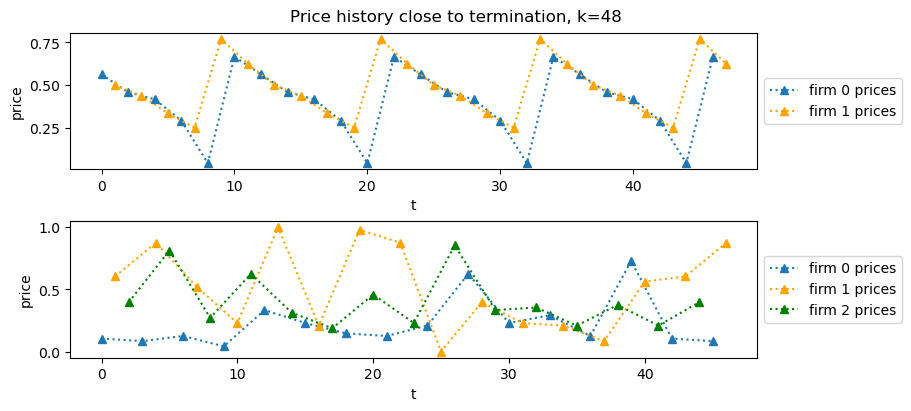

In [11]:
## Price cycles 2 and 3 players
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/12500-1)

cycle2 = 0
fixed2 = 0
cycle3 = 0
fixed3 = 0


for n in range(0, N):
    p_table, avg_profs1, avg_profs2 = pp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s2d = p_table[0, 499950:500000]
    p1s2d = p_table[1, 499950:500000]
        
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s3d = p_table[0, 499950:500000]
    p1s3d = p_table[1, 499950:500000]
    p2s3d = p_table[2, 499950:500000]
    
fig, axs = plt.subplots(2, 1, figsize=(9, 4), constrained_layout=True)
fig.suptitle("Price history close to termination, k=%s"%k)

p0s2d = p0s2d[np.arange(0, p0s2d.size, 2)][:-1]
p1s2d = p1s2d[np.arange(1, p1s2d.size, 2)][:-1]

axs[0].set_xlabel("t")
axs[0].set_ylabel("price")
axs[0].plot(range(0, 48, 2), p0s2d , label="firm 0 prices", marker="^",linestyle="dotted")
axs[0].plot(range(1, 48, 2), p1s2d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

p0s3d = p0s3d[np.arange(0, p0s3d.size, 3)][:-1]
p1s3d = p1s3d[np.arange(1, p1s3d.size, 3)][:-1]
p2s3d = p2s3d[np.arange(2, p2s3d.size, 3)][:-1]

axs[1].set_xlabel("t")
axs[1].set_ylabel("price")
axs[1].plot(range(0, 48, 3), p0s3d , label="firm 0 prices", marker="^", linestyle="dotted")
axs[1].plot(range(1, 48, 3), p1s3d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[1].plot(range(2, 47, 3), p2s3d, label="firm 2 prices", marker="^", color="green", linestyle="dotted")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

#fig.tight_layout()
#plt.show()
plt.savefig("figures/pricehistories_k%s.png"%k)

## Forced deviation

Average 30-period pre-deviation profit is:  3.4895833333333335
Average 30-period profit including deviation:  3.0798611111111107


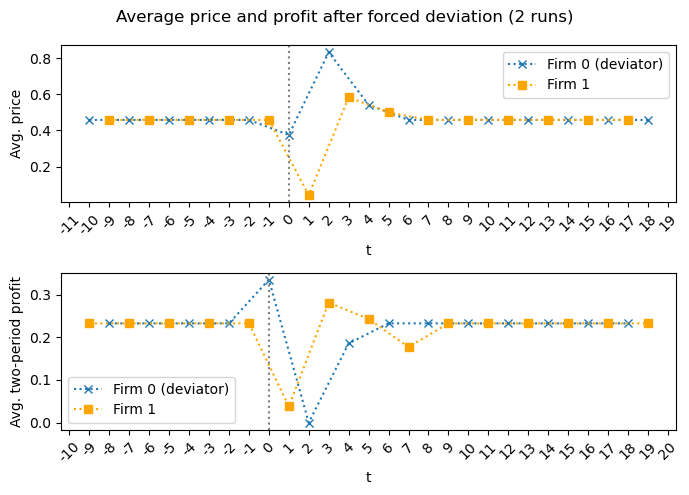

In [12]:
# FORCED DEVIATION 2 PLAYERS
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, 13)

avg_p_0s = np.zeros(30)
avg_p_1s = np.zeros(30)
avg_prof0s = np.zeros(30)
avg_prof1s = np.zeros(30)
ctr = 0 # counts number of fixed-price strategy runs
for n in range(0, N):
    p_table, avg_profs0, avg_profs1 = pp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
    lastps0 = p_table[0, -1000:]
    lastps1 = p_table[1, -1000:]
    var0 = np.var(lastps0[:800])
    var1 = np.var(lastps1[:800])
    avg_var = np.mean([var0, var1])
    
    if abs(avg_var - 0) > 0.01: 
        """
        If the variance in the prices prior to the deviation was too high, we were in a price cycle,
        but since we only want to observe fixed price strategy deviations, we must discard this run.
        """
        continue
    p_0s = p_table[0, 499890:499920] # firm 0 prices before and after deviation
    p_1s = p_table[1, 499890:499920] # firm 1 prices before and after deviation
    # compute profits for each price
    prof0s = [pp.profit(p0t, p1t) for p0t, p1t in zip(p_0s, p_1s)]
    prof1s = [pp.profit(p1t, p0t) for p0t, p1t in zip(p_0s, p_1s)]
    
    avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
    avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
    
    avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
    avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
    
    ctr += 1
# divide all price and profits arrays by number of fixed-price strategy runs
avg_p_0s = np.divide(avg_p_0s, ctr)
avg_p_1s = np.divide(avg_p_1s, ctr)
avg_prof0s = np.divide(avg_prof0s, ctr)
avg_prof1s = np.divide(avg_prof1s, ctr)

fig, axs = plt.subplots(2, 1, figsize=(7, 5))
fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)

# reduce price arrays to only contain prices where the firm is able to set the price
avg_p_0s = np.delete(avg_p_0s, np.arange(0, avg_p_0s.size, 2))
avg_p_1s = np.delete(avg_p_1s, np.arange(1, avg_p_1s.size, 2))[1:]

axs[0].set_xlabel("t")
axs[0].set_ylabel("Avg. price")
axs[0].plot(range(-10, 20, 2), avg_p_0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[0].plot(range(-9, 19, 2), avg_p_1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[0].axvline(x = 0, color = 'grey', linestyle='dotted')

axs[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[0].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
for tick in axs[0].get_xticklabels():
    tick.set_rotation(45)

axs[0].legend()

# reduce profit arrays into two-period profits
avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(1, avg_prof0s.size, 2))[:-1]
avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(0, avg_prof1s.size, 2))

# compute sums of profits for each firm. Was there anything to gain from the deviation?

# pre-deviation profits (profits deviator would have gotten)
pre_total_prof0 = np.sum(avg_prof0s[0]) * 15 # profit for 30 periods, since we just reduced to two-period profits
pre_total_prof1 = np.sum(avg_prof1s[0]) * 15

# post-deviation profits
post_total_prof0 = np.sum(avg_prof0s)
post_total_prof1 = np.sum(avg_prof1s)

axs[1].set_xlabel("t")
axs[1].set_ylabel("Avg. two-period profit")
axs[1].plot(range(-8, 20, 2), avg_prof0s, label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[1].plot(range(-9, 21, 2), avg_prof1s, label="Firm 1", color = "orange", marker="s", linestyle="dotted")
#axs[1].annotate("pre-deviation 30-period profit: %s"%pre_total_prof0, (-8, avg_prof0s[0]))
#axs[1].annotate("post-deviation 30-period profit: %s"%post_total_prof0, (20, avg_prof0s[-1]))
axs[1].axvline(x = 0, color = 'grey', linestyle='dotted')
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
axs[1].xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
for tick in axs[1].get_xticklabels():
    tick.set_rotation(45)
axs[1].legend()

print("Average 30-period pre-deviation profit is: ", pre_total_prof0)
print("Average 30-period profit including deviation: ", post_total_prof0)

fig.tight_layout()
#plt.show()
plt.savefig("figures/forced_deviation2.png")

In [13]:
# REAL FORCED DEVIATION 3 PLAYERS
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, k+1)

avg_p_0s = np.zeros(60)
avg_p_1s = np.zeros(60)
avg_p_2s = np.zeros(60)

avg_prof0s = np.zeros(60) # bad name, this is not the same as avg_profsX from the bertrand_simulation!!
avg_prof1s = np.zeros(60)
avg_prof2s = np.zeros(60)
ctr = 0 # counts number of fixed-price strategy runs
for n in range(0, N):
    p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation_forced_deviation(alpha, delta, T, prices)
    lastps0 = p_table[0, -1000:]
    lastps1 = p_table[1, -1000:]
    var0 = np.var(lastps0[:800])
    var1 = np.var(lastps1[:800])
    avg_var = np.mean([var0, var1])
    
    if abs(avg_var - 0) > 0.001: # flip inequality for fixed prices
       """
       If the variance in the prices prior to the deviation was too low, we were in a fixed price strategy,
       but since we only want to observe price cycle strategy deviations, we must discard this run.
       """
       continue
    p_0s = p_table[0, 499869:499929] # firm 0 prices before and after deviation
    p_1s = p_table[1, 499869:499929] # firm 1 prices before and after deviation
    p_2s = p_table[2, 499869:499929] # firm 2 prices before and after deviation
    
    # compute profits for each price
    prof0s = [ppp.profit(p0t, p1t, p2t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    prof1s = [ppp.profit(p1t, p2t, p0t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    prof2s = [ppp.profit(p2t, p0t, p1t) for p0t, p1t, p2t in zip(p_0s, p_1s, p_2s)]
    
    avg_p_0s = np.sum([avg_p_0s, p_0s], axis = 0)
    avg_p_1s = np.sum([avg_p_1s, p_1s], axis = 0)
    avg_p_2s = np.sum([avg_p_2s, p_2s], axis = 0)
    
    avg_prof0s = np.sum([avg_prof0s, prof0s], axis = 0)
    avg_prof1s = np.sum([avg_prof1s, prof1s], axis = 0)
    avg_prof2s = np.sum([avg_prof2s, prof2s], axis = 0)
    
    ctr += 1
# divide all price and profits arrays by number of runs
avg_p_0s = np.divide(avg_p_0s, ctr)
avg_p_1s = np.divide(avg_p_1s, ctr)
avg_p_2s = np.divide(avg_p_2s, ctr)

avg_prof0s = np.divide(avg_prof0s, ctr)
avg_prof1s = np.divide(avg_prof1s, ctr)
avg_prof2s = np.divide(avg_prof2s, ctr)

reduced_avg_p_0s = avg_p_0s[0+2::3] # p_0 for t=(-30, -27, -24, ..., 0, 3, 6, ..., 27, 30)
reduced_avg_p_1s = avg_p_1s[1+2::3] # p_1 for t=(-29, -26, -23, ..., 1, 4, 7,..., 25, 28) 
reduced_avg_p_2s = avg_p_2s[2+2::3] # p_2 for t=(-28, -25, -22, ..., 2, 5, 8,..., 26, 29)

# p_0: -30, -27, -24, -21, -18, -15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30
# p_1: -29, -26, -23, -20, -17, -14, -11, -8, -5, -2, 1, 4, 7, 10, 13, 16, 19, 22, 25, 28
# p_2: -28, -25, -22, -19, -16, -13, -10, -7, -4, -1, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29

# since p_0 has one extra period at the end, we remove it
reduced_avg_p_0s = reduced_avg_p_0s[:-1]

# reduce profit arrays into three-period profits (remove last periods to make sure all profits span the same periods)
reduced_avg_prof0s = np.add.reduceat(avg_prof0s, np.arange(0, avg_prof0s.size, 3))[:-1]
reduced_avg_prof1s = np.add.reduceat(avg_prof1s, np.arange(1, avg_prof1s.size, 3))[:-1]
reduced_avg_prof2s = np.add.reduceat(avg_prof2s, np.arange(2, avg_prof2s.size, 3))[:-1]

# compute sums of profits for each firm. Was there anything to gain from the deviation?
# pre-deviation profits (profits deviator firm would have gotten)
pre_mean_prof0 = np.mean(reduced_avg_prof0s[1:10]) # profit for 24 periods pre-deviation
#pre_total_prof1 = np.sum(avg_prof1s[0]) * 10
#pre_total_prof2 = np.sum(avg_prof2s[0]) * 10

# -27, -24, -21, -18, -15, -12, -9, -6, -3
# 0, 3, 6, 9, 12, 15, 18, 21, 24, 27

# post-deviation profits
post_mean_prof0 = np.mean(reduced_avg_prof0s[10:]) # profit for 27 periods post-deviation
#post_total_prof1 = np.sum(avg_prof1s)
#post_total_prof2 = np.sum(avg_prof2s)


/tmp/ipykernel_13801/3070408702.py:48: RuntimeWarning: invalid value encountered in true_divide
  avg_p_0s = np.divide(avg_p_0s, ctr)
/tmp/ipykernel_13801/3070408702.py:49: RuntimeWarning: invalid value encountered in true_divide
  avg_p_1s = np.divide(avg_p_1s, ctr)
/tmp/ipykernel_13801/3070408702.py:50: RuntimeWarning: invalid value encountered in true_divide
  avg_p_2s = np.divide(avg_p_2s, ctr)
/tmp/ipykernel_13801/3070408702.py:52: RuntimeWarning: invalid value encountered in true_divide
  avg_prof0s = np.divide(avg_prof0s, ctr)
/tmp/ipykernel_13801/3070408702.py:53: RuntimeWarning: invalid value encountered in true_divide
  avg_prof1s = np.divide(avg_prof1s, ctr)
/tmp/ipykernel_13801/3070408702.py:54: RuntimeWarning: invalid value encountered in true_divide
  avg_prof2s = np.divide(avg_prof2s, ctr)


Mean per-period pre-deviation profit is:  nan
Mean per-period post-deviation profit is:  nan


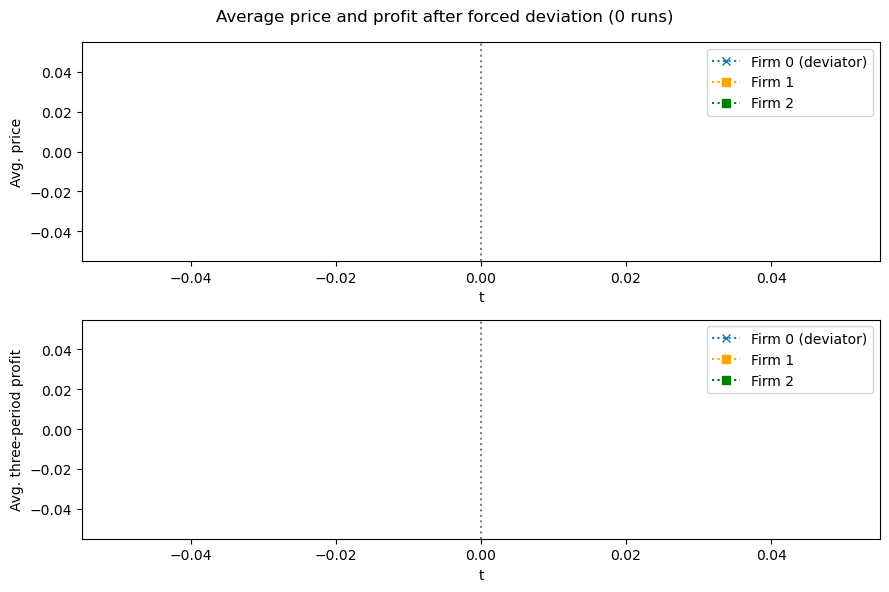

In [14]:
fig, axs = plt.subplots(2, 1, figsize=(9, 6))
fig.suptitle("Average price and profit after forced deviation (%s runs)"%ctr)

# price plot
axs[0].set_xlabel("t")
axs[0].set_ylabel("Avg. price")
axs[0].plot(range(-27, 27, 3), reduced_avg_p_0s[1:], label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[0].plot(range(-26, 28, 3), reduced_avg_p_1s[1:], label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[0].plot(range(-25, 29, 3), reduced_avg_p_2s[1:], label="Firm 2", color = "green", marker="s", linestyle="dotted")
axs[0].axvline(x = 0, color = 'grey', linestyle='dotted')
axs[0].legend()

# profit plot
axs[1].set_xlabel("t")
axs[1].set_ylabel("Avg. three-period profit")
axs[1].plot(range(-27, 27, 3), reduced_avg_prof0s[1:], label="Firm 0 (deviator)", marker="x", linestyle="dotted")
axs[1].plot(range(-26, 28, 3), reduced_avg_prof1s[:-1], label="Firm 1", color = "orange", marker="s", linestyle="dotted")
axs[1].plot(range(-25, 29, 3), reduced_avg_prof2s[:-1], label="Firm 2", color = "green", marker="s", linestyle="dotted")
axs[1].axvline(x = 0, color = 'grey', linestyle='dotted')
axs[1].legend()

# compute means of profits for firm 0. Was there anything to gain from the deviation?
# mean pre-deviation profits
pre_mean_prof0 = np.mean(reduced_avg_prof0s[1:10]) # profit for 24 periods pre-deviation
# mean post-deviation profits
post_mean_prof0 = np.mean(reduced_avg_prof0s[10:]) # profit for 27 periods post-deviation

print("Mean per-period pre-deviation profit is: ", pre_mean_prof0)
print("Mean per-period post-deviation profit is: ", post_mean_prof0)
fig.tight_layout()
#plt.show()
plt.savefig("figures/forced_deviation3_k%s.png"%k)

## Convergence

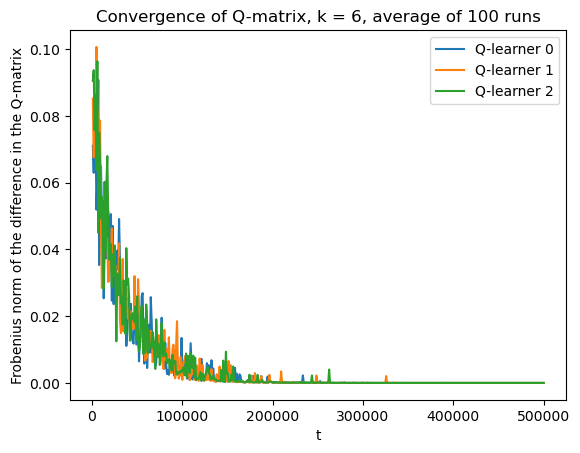

KeyboardInterrupt: 

In [15]:
# Convergence 3 player
k_array=[6,12,24,48]
for k in k_array:
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 10
    prices = np.linspace(0, 1, k)
    Q_norm_summed0 = np.zeros(int(T/1000 - 1))
    Q_norm_summed1 = np.zeros(int(T/1000 - 1))
    Q_norm_summed2 = np.zeros(int(T/1000 - 1))

    for n in range(0, N):
        p_table, Q_norm_array0, Q_norm_array1, Q_norm_array2 = ppp.bertrand_simulation_convergence(alpha, delta, T, prices)
        Q_norm_summed0 = np.sum([Q_norm_summed0, Q_norm_array0], axis=0)
        Q_norm_summed1 = np.sum([Q_norm_summed1, Q_norm_array1], axis=0)
        Q_norm_summed2 = np.sum([Q_norm_summed2, Q_norm_array2], axis=0)

    Q_norm_summed0 = Q_norm_summed0/N
    Q_norm_summed1 = Q_norm_summed1/N
    Q_norm_summed2 = Q_norm_summed2/N
    # Convergence plot

    # Generate the index array
    index = np.linspace(1000, 500000, 499)

    # Plot the arrays on the same plot
    plt.plot(index, Q_norm_summed0, label='Q-learner 0')
    plt.plot(index, Q_norm_summed1, label='Q-learner 1')
    plt.plot(index, Q_norm_summed2, label='Q-learner 2')

    # Set labels and title
    plt.xlabel('t')
    plt.ylabel('Frobenius norm of the difference in the Q-matrix')
    plt.title(f'Convergence of Q-matrix, k = {k}, average of 100 runs')

    # Show legend
    plt.legend()

    # Display the plot
    plt.savefig(f'figures/convergenceP3k{k}.png', facecolor='w')
    plt.show()

In [ ]:
# Convergence 2 player
k_array=[6,12,24,48]
for k in k_array:
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    N = 10
    prices = np.linspace(0, 1, k)
    Q_norm_summed0 = np.zeros(int(T/1000 - 1))
    Q_norm_summed1 = np.zeros(int(T/1000 - 1))

    for n in range(0, N):
        p_table, Q_norm_array0, Q_norm_array1 = pp.bertrand_simulation_convergence(alpha, delta, T, prices)
        Q_norm_summed0 = np.sum([Q_norm_summed0, Q_norm_array0], axis=0)
        Q_norm_summed1 = np.sum([Q_norm_summed1, Q_norm_array1], axis=0)

    Q_norm_summed0 = Q_norm_summed0/N
    Q_norm_summed1 = Q_norm_summed1/N
    # Convergence plot

    # Generate the index array
    index = np.linspace(1000, 500000, 499)

    # Plot the arrays on the same plot
    plt.plot(index, Q_norm_summed0, label='Q-learner 0')
    plt.plot(index, Q_norm_summed1, label='Q-learner 1')

    # Set labels and title
    plt.xlabel('t')
    plt.ylabel('Frobenius norm of the difference in the Q-matrix')
    plt.title(f'Convergence of Q-matrix, k = {k}, average of 100 runs')

    # Show legend
    plt.legend()

    # Display the plot
    plt.savefig(f'figures/convergenceP2k{k}.png', facecolor='w')
    plt.show()

## Strategy outcomes pt2 (price cycles and profit shares)

In [ ]:
## Price cycles 3 players and profits
alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/12500-1)

for n in range(0, N):
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s3d = p_table[0, 499950:500000]
    p1s3d = p_table[1, 499950:500000]
    p2s3d = p_table[2, 499950:500000]
    
# compute profits for each price
prof0s = [ppp.profit(p0t, p1t, p2t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)]
prof1s = [ppp.profit(p1t, p2t, p0t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)]
prof2s = [ppp.profit(p2t, p0t, p1t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)]
total_profs = np.sum([prof0s, prof1s, prof2s], axis=0)

# check for division-by-zero errors
if 0 in total_profs:
    print("Error! One period had zero profit, division not possible. Try another run.")

share_prof0s = np.divide(prof0s, total_profs)
share_prof1s = np.divide(prof1s, total_profs)
share_prof2s = np.divide(prof2s, total_profs)

#print("total_profs: ", total_profs[0:10])
#print("share_prof0s: ", share_prof0s[0:10])
#print("share_prof1s: ", share_prof1s[0:10])
#print("share_prof2s: ", share_prof2s[0:10])


fig, axs = plt.subplots(3, 1, figsize=(9, 7), gridspec_kw={'height_ratios': [3, 3, 1]})
fig.suptitle("Example of price cycles and resulting profit shares, k=%s"%k)

p0s3d = p0s3d[np.arange(0, p0s3d.size, 3)][:-1]
p1s3d = p1s3d[np.arange(1, p1s3d.size, 3)][:-1]
p2s3d = p2s3d[np.arange(2, p2s3d.size, 3)][:-1]

axs[0].set_xlabel("t")
axs[0].set_ylabel("price")
axs[0].plot(range(0, 48, 3), p0s3d , label="firm 0 prices", marker="^", linestyle="dotted")
axs[0].plot(range(1, 48, 3), p1s3d, label="firm 1 prices", marker="^", color="orange", linestyle="dotted")
axs[0].plot(range(2, 47, 3), p2s3d, label="firm 2 prices", marker="^", color="green", linestyle="dotted")
axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# reduce each firms profit share to 3-period profit for each firms turn
reduced_share_prof0s = np.add.reduceat(share_prof0s/3, np.arange(0, share_prof0s.size, 3))[:-1]
reduced_share_prof1s = np.add.reduceat(share_prof1s/3, np.arange(1, share_prof1s.size, 3))[:-1]
reduced_share_prof2s = np.add.reduceat(share_prof2s/3, np.arange(2, share_prof2s.size, 3))[:-1]

summed_prof0 = np.sum(prof0s[:-1])# remember to remove last element like above
summed_prof1 = np.sum(prof1s[:-1])
summed_prof2 = np.sum(prof2s[:-1])

axs[1].set_xlabel("t")
axs[1].set_ylabel("share of total profit")
axs[1].plot(range(0, 48, 3), reduced_share_prof0s, label="firm 0 3-period share of profit", marker="o", linestyle="dotted")
axs[1].plot(range(1, 48, 3), reduced_share_prof1s, label="firm 1 3-period share of profit", marker="o", color="orange", linestyle="dotted")
axs[1].plot(range(2, 47, 3), reduced_share_prof2s, label="firm 2 3-period share of profit", marker="o", color="green", linestyle="dotted")
axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

axs[2].axis("off")
tab = [['Firm 0 total profit:',"{}".format(summed_prof0)],
       ['Firm 1 total profit:',"{}".format(summed_prof1)],
       ['Firm 2 total profit:',"{}".format(summed_prof2)]]
axs[2].table(tab, loc='center')

fig.tight_layout()
#plt.show()
plt.savefig("figures/pricecycles_profitshares_k%s.png"%k)

In [ ]:
# how many runs ended in 0 profit for 1 firm?
#ks = [6, 12, 24, 48]

alpha, delta = 0.3, 0.95  # values from Klein(2021)
T = 500000
N = 10
prices = np.linspace(0, 1, k+1)
num_calcs = int(T/12500-1)

zero_prof_runs = 0
profitable_runs = 0

for n in range(0, N):
    p_table, avg_profs1, avg_profs2, avg_profs3 = ppp.bertrand_simulation(alpha, delta, T, prices)
    
    # grab section of last 50 prices for inspection
    p0s3d = p_table[0, 499950:500000]
    p1s3d = p_table[1, 499950:500000]
    p2s3d = p_table[2, 499950:500000]
    
    #compute profits for each price
    prof0s = np.array([ppp.profit(p0t, p1t, p2t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)])
    prof1s = np.array([ppp.profit(p1t, p2t, p0t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)])
    prof2s = np.array([ppp.profit(p2t, p0t, p1t) for p0t, p1t, p2t in zip(p0s3d, p1s3d, p2s3d)])
    if np.allclose(prof0s, np.zeros(prof0s.size)) or np.allclose(prof1s, np.zeros(prof1s.size)) or np.allclose(prof2s, np.zeros(prof2s.size)):
        zero_prof_runs += 1
    else:
        profitable_runs += 1
    

fig, axs = plt.subplots(1, 1)
fig.suptitle("Zero profit run for 1 or more firms, k={} ({} runs)".format(k, N))
strats = ['zero profit runs for 1 or more firms','profitable run for all firms']
outcomes = [zero_prof_runs, profitable_runs]
#axs.set_xlabel("Strategy outcome, two players")
axs.set_ylabel("Frequency")
axs.set_ylim(0, N)
axs.bar(strats, outcomes)
#axs[0].legend(loc='upper right')

fig.tight_layout()
#plt.show()
plt.savefig("figures/strategyoutcomes_k%s"%k)

In [ ]:
@njit
def profs_are_zero():
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    T = 500000
    prices = np.linspace(0, 1, k+1)
    
    tol = 1e-6
        
    p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation(alpha, delta, T, prices)
    if abs(avg_profs0[-1] - 0.0) < tol or abs(avg_profs1[-1] - 0.0) < tol or abs(avg_profs2[-1] - 0.0) < tol:
        return True
    else:
        return False

In [ ]:
def find_zero_profit_runs(Ts, N, k):
    # Zero-profit runs for the 3 player game
    alpha, delta = 0.3, 0.95  # values from Klein(2021)
    
    prices = np.linspace(0, 1, k+1)
    
    tol = 1e-6
    
    zeroRunOutcomes = np.zeros(Ts.size)
    nonZeroRunOutcomes = np.zeros(Ts.size)
    
    for idx, T in enumerate(Ts):
        print("idx:", idx)
        zeroprofitruns = 0
        nonzeroprofitruns = 0
        for n in range(0, N):
            p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation(alpha, delta, T, prices)
            if abs(avg_profs0[-1] - 0.0) < tol or abs(avg_profs1[-1] - 0.0) < tol or abs(avg_profs2[-1] - 0.0) < tol:
                zeroprofitruns += 1
            else: 
                nonzeroprofitruns += 1
        zeroRunOutcomes[idx] = zeroprofitruns
        nonZeroRunOutcomes[idx] = nonzeroprofitruns

    # divide by N to get percentages
    zeroRunOutcomesPct = np.divide(zeroRunOutcomes, N)
    nonZeroRunOutcomesPct = np.divide(nonZeroRunOutcomes, N)

    return zeroRunOutcomesPct, nonZeroRunOutcomesPct 

In [ ]:
k = 48
Ts = np.array([500000, 1000000, 5000000, 10000000])
N = 10

start = time.time()
zeroRunOutcomesPct, nonZeroRunOutcomesPct = find_zero_profit_runs(Ts, N, k)
stop = time.time()
print("elapsed time: ", stop-start, "seconds")

X = ["%s"%(int(T/1000)) for T in Ts]
X_axis = np.arange(len(X))
fig, axs = plt.subplots(1, 1, figsize=(7,6))
fig.suptitle("Zero-profit runs for 1 or more firms, k={} ({} runs)".format(k, N))
axs.set_xlabel(r"$T$ (in thousands)")
axs.set_ylabel("Frequency")
axs.set_xticks(X_axis, X)
#axs.set_ylim(0, N)
zerobars = axs.bar(X_axis - 0.2, zeroRunOutcomesPct, 0.4, label="zero-profit runs")
nonzerobars = axs.bar(X_axis + 0.2, nonZeroRunOutcomesPct, 0.4, label="nonzero-profit runs")

for bar in zerobars:
    height = bar.get_height()
    axs.annotate(f'{height*100}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
    textcoords="offset points", ha='center', va='bottom')
    
#for bar in nonzerobars:
#    height = bar.get_height()
#    axs.annotate(f'{height*100}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
#    textcoords="offset points", ha='center', va='bottom')

axs.yaxis.set_major_formatter(PercentFormatter(1))
axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
#plt.show()
plt.savefig("figures/zeroprofitruns_k%s"%k)

In [ ]:
#np.savetxt("data_zero.csv", zeroRunOutcomesPct, delimiter=",")
#np.savetxt("data_nonzero.csv", nonZeroRunOutcomesPct, delimiter=",")

In [ ]:
## NOT USED
# def find_zero_profit_runs_theta(T, thetas, N, k):
#     # Zero-profit runs for the 3 player game
#     alpha, delta = 0.3, 0.95  # values from Klein(2021)
#     
#     prices = np.linspace(0, 1, k+1)
#     
#     tol = 1e-6
#     
#     zeroRunOutcomes = np.zeros(thetas.size)
#     nonZeroRunOutcomes = np.zeros(thetas.size)
#     
#     for idx, theta in enumerate(thetas):
#         print("idx:", idx)
#         zeroprofitruns = 0
#         nonzeroprofitruns = 0
#         for n in range(0, N):
#             p_table, avg_profs0, avg_profs1, avg_profs2 = ppp.bertrand_simulation_theta(alpha, delta, T, theta, prices)
#             if abs(avg_profs0[-1] - 0.0) < tol or abs(avg_profs1[-1] - 0.0) < tol or abs(avg_profs2[-1] - 0.0) < tol:
#                 zeroprofitruns += 1
#             else: 
#                 nonzeroprofitruns += 1
#         zeroRunOutcomes[idx] = zeroprofitruns
#         nonZeroRunOutcomes[idx] = nonzeroprofitruns
# 
#     # divide by N to get percentages
#     zeroRunOutcomesPct = np.divide(zeroRunOutcomes, N)
#     nonZeroRunOutcomesPct = np.divide(nonZeroRunOutcomes, N)
# 
#     return zeroRunOutcomesPct, nonZeroRunOutcomesPct 

In [ ]:
## NOT USED
# k = 48
# T = 500000
# N = 100
# 
# # calculate the decay parameter theta
# 
# thetas = np.array([-(1/1000000)**(1/T) + 1, -(1/100000)**(1/T) + 1,  -(1/100000)**(1/T) + 1, -(1/10000)**(1/T) + 1])
# 
# start = time.time()
# zeroRunOutcomesPct, nonZeroRunOutcomesPct = find_zero_profit_runs_theta(T, thetas, N, k)
# stop = time.time()
# print("elapsed time: ", stop-start, "seconds")
# 
# X = ["%s"%theta for theta in thetas]
# X_axis = np.arange(len(X))
# fig, axs = plt.subplots(1, 1, figsize=(7,6))
# fig.suptitle("Zero-profit runs for 1 or more firms, k={} ({} runs)".format(k, N))
# axs.set_xlabel(r"$\theta$")
# axs.set_ylabel("Frequency")
# axs.set_xticks(X_axis, X)
# #axs.set_ylim(0, N)
# zerobars = axs.bar(X_axis - 0.2, zeroRunOutcomesPct, 0.4, label="zero-profit runs")
# nonzerobars = axs.bar(X_axis + 0.2, nonZeroRunOutcomesPct, 0.4, label="nonzero-profit runs")
# 
# for bar in zerobars:
#     height = bar.get_height()
#     axs.annotate(f'{height*100}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
#     textcoords="offset points", ha='center', va='bottom')
#     
# #for bar in nonzerobars:
# #    height = bar.get_height()
# #    axs.annotate(f'{height*100}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
# #    textcoords="offset points", ha='center', va='bottom')
# 
# axs.yaxis.set_major_formatter(PercentFormatter(1))
# axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# fig.tight_layout()
# #plt.show()
# plt.savefig("figures/zeroprofitruns_k%s"%k)